In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
#Image CLASS-ID SPECIES BREED ID
#ID: 1:37 Class ids
#SPECIES: 1:Cat 2:Dog
#BREED ID: 1-25:Cat 1:12:Dog
#All images with 1st letter as captial are cat images
#images with small first letter are dog images

df = pd.read_csv('./data/annotations/list.txt', skiprows=6, delimiter=' ', header=None)
df.columns = ['file_name', 'id', 'species', 'breed']

In [11]:
df

,file_name,id,species,breed
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1
...,...,...,...,...
7344,yorkshire_terrier_96,37,2,25
7345,yorkshire_terrier_97,37,2,25
7346,yorkshire_terrier_98,37,2,25
7347,yorkshire_terrier_99,37,2,25


In [12]:
print(df['species'].value_counts().sort_index())

1    2371
2    4978
Name: species, dtype: int64


([<matplotlib.axis.XTick at 0x211ac6fd7f0>,
 [Text(0, 0, '1'), Text(1, 0, '2')])

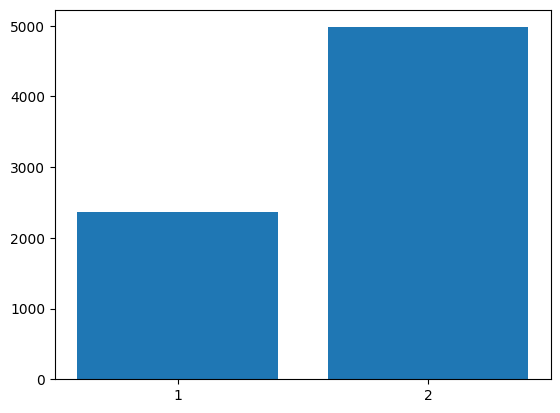

In [13]:
value_counts = df['species'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

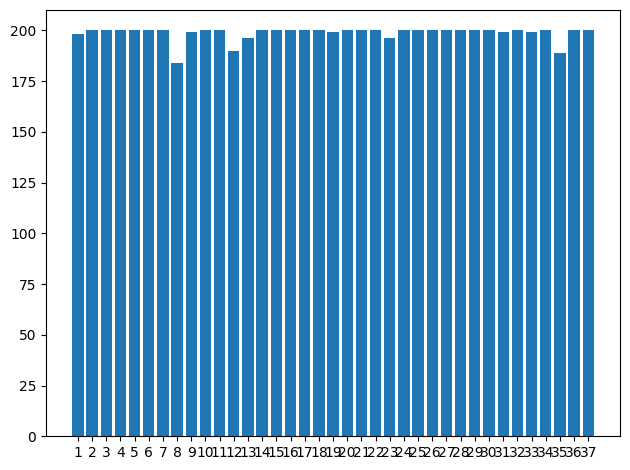

In [14]:
value_counts = df['id'].value_counts().sort_index()
plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)
plt.tight_layout()

# 개와 고양이 합쳐서 종이 37개 존재

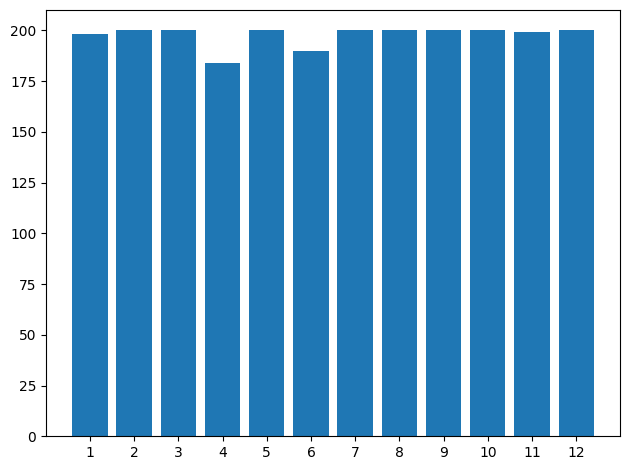

In [15]:
# 고양이 종만 출력
value_counts = df[df['species'] == 1]['breed'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)
plt.tight_layout()

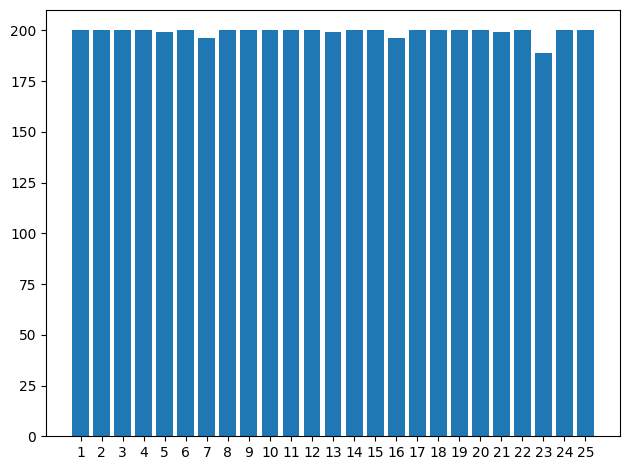

In [16]:
# 강아지 종만 출력
value_counts = df[df['species'] == 2]['breed'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)
plt.tight_layout()

In [17]:
image_dir = 'data\\images\\'
bbox_dir = 'data\\annotations\\xmls\\'
seg_dir = 'data\\annotations\\trimaps\\'

In [18]:
import os
from glob import glob # 한꺼번에 디렉토리 가져옴

In [19]:
image_files = glob(image_dir + '*.jpg')
len(image_files)

7390

In [20]:
image_files[:5]

['data\\images\\boxer_16.jpg',
 'data\\images\\chihuahua_165.jpg',
 'data\\images\\pug_183.jpg',
 'data\\images\\english_setter_1.jpg',
 'data\\images\\chihuahua_170.jpg']

In [21]:
bbox_files = glob(bbox_dir + '*.xml')
len(bbox_files)

3686

In [22]:
bbox_files[:5]

['data\\annotations\\xmls\\Abyssinian_1.xml',
 'data\\annotations\\xmls\\Abyssinian_10.xml',
 'data\\annotations\\xmls\\Abyssinian_100.xml',
 'data\\annotations\\xmls\\Abyssinian_101.xml',
 'data\\annotations\\xmls\\Abyssinian_102.xml']

In [23]:
import cv2
import xml.etree.ElementTree as et # xml 파싱
from matplotlib.patches import Rectangle

In [24]:
images_path = image_files[2]
print(images_path)

# xml 파일과 image 파일들이 이름이 같아서 확장명만 바꾸면 동일하게 매칭 가능
bbox_path = images_path.replace(image_dir, bbox_dir).replace('jpg', 'xml')
print(bbox_path)

data\images\pug_183.jpg
data\annotations\xmls\pug_183.xml


In [25]:
image = cv2.imread(images_path)
print(image.shape) # 세로, 가로, 채널
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

(300, 279, 3)


In [26]:
tree = et.parse(bbox_path) # xml 경로를 넣어서 파싱
tree

In [27]:
xmin = float(tree.find('/object/bndbox/xmin').text)
xmax = float(tree.find('/object/bndbox/xmax').text)
ymin = float(tree.find('/object/bndbox/ymin').text)
ymax = float(tree.find('/object/bndbox/ymax').text)
print(xmin, xmax, ymin, ymax)

rect_x = xmin
rect_y = ymin
rect_w = xmax - xmin
rect_h = ymax - ymin
print(rect_x, rect_y, rect_w, rect_h)

105.0 230.0 37.0 138.0
105.0 37.0 125.0 101.0


C:\Users\82103\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: This search is broken in 1.3 and earlier, and will be fixed in a future version.  If you rely on the current behaviour, change it to './object/bndbox/xmin'
  """Entry point for launching an IPython kernel.
C:\Users\82103\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: This search is broken in 1.3 and earlier, and will be fixed in a future version.  If you rely on the current behaviour, change it to './object/bndbox/xmax'
  
C:\Users\82103\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: This search is broken in 1.3 and earlier, and will be fixed in a future version.  If you rely on the current behaviour, change it to './object/bndbox/ymin'
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\82103\AppData\Local\Programs\Python\Python37\lib\sit

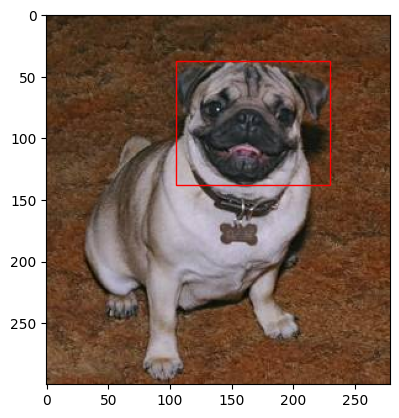

In [28]:
rect = Rectangle((rect_x, rect_y), rect_w, rect_h, fill=False, color='red')
plt.axes().add_patch(rect)
plt.imshow(image)
plt.show()

In [29]:
image_path = image_files[2]
print(image_path)

data\images\pug_183.jpg


In [30]:
seg_path = image_path.replace(image_dir, seg_dir).replace('jpg', 'png')
print(seg_path)

data\annotations\trimaps\pug_183.png


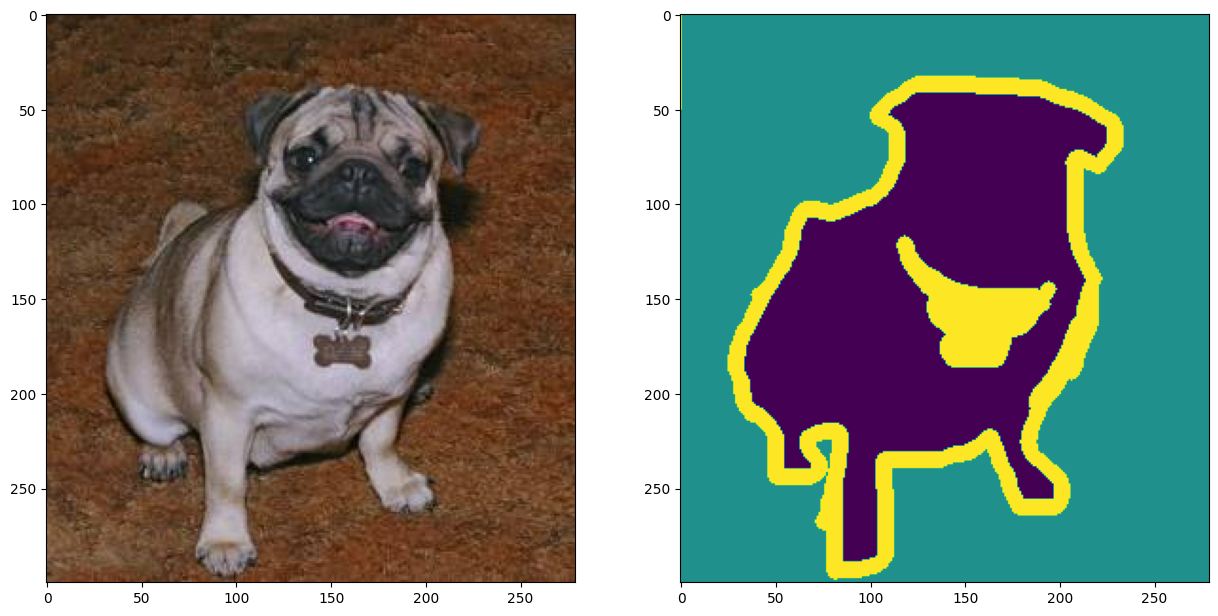

In [31]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
seg_map = cv2.imread(seg_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(seg_map)
plt.show()

### 교차 검증
* 데이터의 수가 적은 경우 데이터 중의 일부인 검증 데이터의 수도 적기 때문에 검증 성능의 신뢰도가 떨어짐
* 검증 데이터의 수가 증가시키면 학습용 데이터의 수가 적어지므로 정상적인 학습이 되지 않음
* 데이터 수가 적은 경우 해결하기 위한 겸증 방법
* 과적합을 해결하기 위한 방법

In [32]:
from sklearn.model_selection import KFold

In [33]:
df

,file_name,id,species,breed
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1
...,...,...,...,...
7344,yorkshire_terrier_96,37,2,25
7345,yorkshire_terrier_97,37,2,25
7346,yorkshire_terrier_98,37,2,25
7347,yorkshire_terrier_99,37,2,25


In [34]:
kf = KFold(n_splits=5, shuffle=True, random_state=40)

df['fold'] = -1

In [35]:
for idx, (t, v) in enumerate(kf.split(df), 1):
    print(t, v, len(v))
    df.loc[v, 'fold'] = idx # fold 번호 매기기

[   2    3    4 ... 7346 7347 7348] [   0    1    5 ... 7326 7327 7333] 1470
[   0    1    2 ... 7344 7345 7347] [   3   15   17 ... 7338 7346 7348] 1470
[   0    1    3 ... 7346 7347 7348] [   2    4   12 ... 7330 7334 7337] 1470
[   0    1    2 ... 7346 7347 7348] [   7    8   14 ... 7341 7343 7344] 1470
[   0    1    2 ... 7344 7346 7348] [   9   11   21 ... 7342 7345 7347] 1469


In [37]:
print(len(df[df['fold'] == 1]))

1470


In [38]:
print(len(df[df['fold'] != 1]))

5879


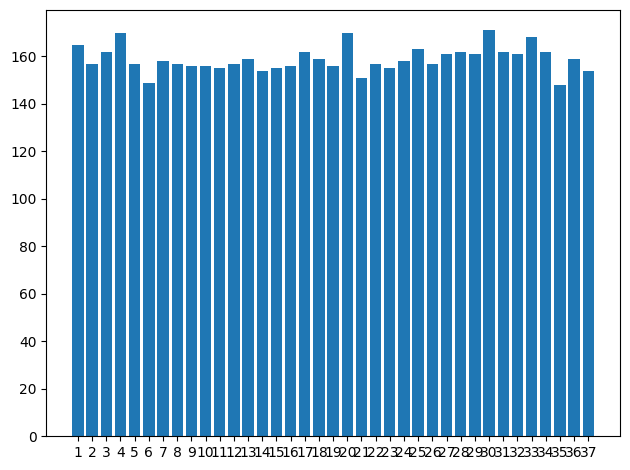

In [39]:
value_counts = df[df['fold'] != 5]['id'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)
plt.tight_layout()
plt.show()

In [40]:
from sklearn.model_selection import StratifiedKFold

In [41]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=40)

df['fold'] = -1

for idx, (t, v) in enumerate(skf.split(df, df['id']), 1): # df['id']로 평탄화
    print(t, v, len(v))
    df.loc[v, 'fold'] = idx # fold 번호 매기기

[   0    2    4 ... 7345 7346 7348] [   1    3   13 ... 7337 7342 7347] 1470
[   0    1    2 ... 7346 7347 7348] [   6   25   31 ... 7333 7340 7344] 1470
[   1    3    4 ... 7344 7345 7347] [   0    2    8 ... 7343 7346 7348] 1470
[   0    1    2 ... 7346 7347 7348] [   7   10   11 ... 7336 7341 7345] 1470
[   0    1    2 ... 7346 7347 7348] [   4    5    9 ... 7321 7328 7338] 1469


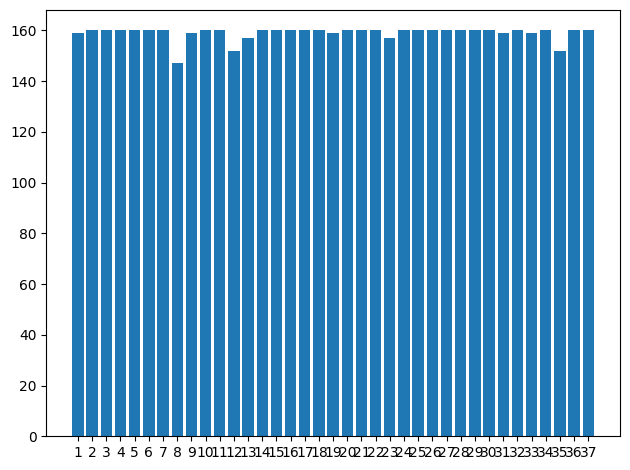

In [42]:
value_counts = df[df['fold'] != 5]['id'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)
plt.tight_layout()
plt.show()

In [43]:
df.to_csv('data/kfolds.csv', index=False)